# **Hand Written Digital Prediction - Classification Analysis**

The digit dataset consists of 8x8 pixels images of digits .The images attribute of the dataset stores 8x8 arrays of grayscale values for each image we will use these arrays to vizualize the first 4 images.The target attribute of the dataset stores the digit each image represents

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

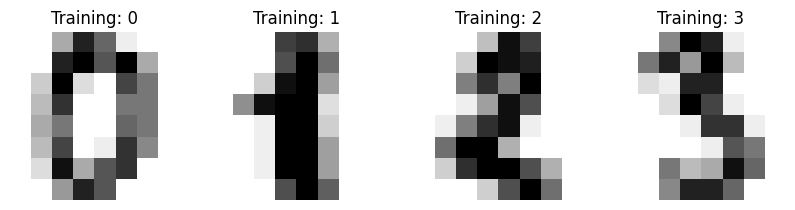

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


# **` Data Preprocessing`**

Flatten Image
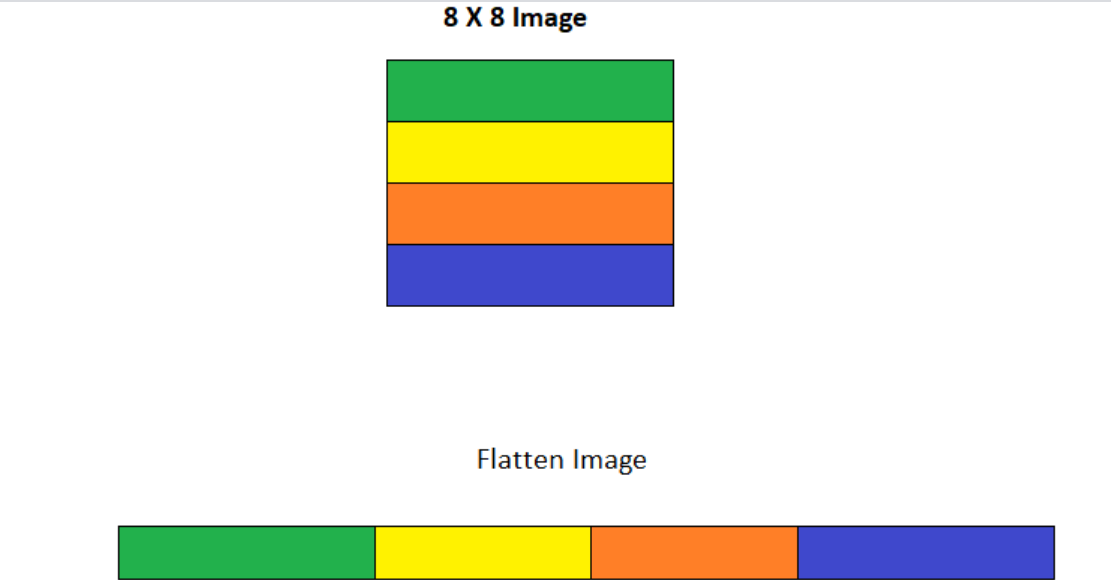

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape


(8, 8)

In [ ]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [ ]:
data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape


(64,)

In [ ]:
data.shape


(1797, 64)

Scaling Image data

In [ ]:
data.min()


0.0

In [ ]:
data.max()


16.0

In [ ]:
data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test, = train_test_split(data, df.target, test_size=0.3)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier()


In [ ]:
rf.fit(X_train, y_train)


RandomForestClassifier()

Predict Test Data

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
y_pred


array([2, 6, 5, 8, 8, 7, 5, 9, 7, 8, 7, 4, 3, 8, 3, 1, 7, 2, 4, 0, 0, 7,
       7, 8, 1, 0, 1, 1, 3, 0, 1, 3, 1, 8, 9, 6, 5, 7, 3, 7, 3, 3, 8, 3,
       4, 0, 5, 8, 1, 9, 8, 0, 2, 7, 7, 1, 7, 4, 0, 3, 7, 7, 2, 2, 8, 4,
       1, 7, 7, 0, 0, 6, 5, 3, 1, 4, 0, 8, 2, 5, 4, 0, 5, 0, 7, 8, 6, 9,
       0, 4, 3, 6, 4, 8, 1, 7, 3, 2, 6, 8, 5, 3, 2, 6, 1, 0, 4, 6, 5, 5,
       4, 4, 7, 4, 1, 5, 3, 9, 7, 8, 5, 3, 2, 4, 6, 3, 0, 8, 3, 1, 5, 8,
       5, 8, 8, 0, 0, 9, 0, 1, 0, 5, 8, 5, 1, 4, 0, 1, 4, 0, 2, 2, 3, 1,
       7, 0, 2, 3, 0, 2, 6, 4, 4, 9, 6, 6, 1, 8, 3, 3, 5, 4, 3, 3, 0, 3,
       0, 1, 6, 8, 0, 4, 0, 9, 6, 5, 6, 9, 5, 6, 8, 3, 5, 9, 3, 5, 0, 8,
       4, 6, 1, 0, 7, 4, 5, 8, 2, 8, 7, 9, 4, 1, 8, 2, 5, 0, 1, 4, 3, 9,
       3, 7, 5, 6, 6, 8, 4, 2, 0, 1, 7, 4, 6, 9, 2, 5, 4, 7, 4, 7, 2, 2,
       3, 5, 0, 9, 9, 1, 6, 5, 5, 7, 3, 1, 4, 5, 4, 6, 4, 1, 8, 9, 4, 3,
       0, 4, 9, 5, 0, 7, 1, 0, 6, 5, 9, 9, 7, 3, 7, 5, 1, 9, 3, 3, 8, 7,
       6, 8, 5, 2, 6, 0, 7, 0, 0, 3, 9, 9, 9, 9, 0,

Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
confusion_matrix(y_test, y_pred)


array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 61,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  2],
       [ 0,  3,  0,  0,  0,  1,  0,  1, 54,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  3,  0, 49]])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      1.00      0.97        53
           2       1.00      1.00      1.00        43
           3       0.98      0.98      0.98        56
           4       0.96      0.98      0.97        51
           5       0.95      0.98      0.97        62
           6       1.00      0.96      0.98        48
           7       0.91      0.96      0.94        53
           8       0.98      0.92      0.95        59
           9       0.94      0.89      0.92        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

